%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

# Kalman filter a gentler introduction

## The problem statement

The Kalman filter model assumes that the state of a system at a time t evolved from the prior state at time t-1 according to the equation :

\begin{equation*}
\boldsymbol x_t = \boldsymbol F_t \boldsymbol x_{t-1} + \boldsymbol B_t \boldsymbol u_t + \boldsymbol w_t
\label{eq:state_eq} \tag{1}
\end{equation*}

where: 
 - $\pmb{x_t}$ is the state vector containing the terms of interest for the system (e.g., position, velocity, heading) at time t
 - $\pmb{u_t}$ is the vector containing any control inputs (steering angle, throttle setting, braking force)
 - $\pmb{F_t}$ is the state transition matrix which applies the effect of each system state parameter at time $t-1$ on the system state at time $t$ (e.g., the position and velocity at time $t-1$ both affect the position at time $t$)
 - $\pmb{B_t}$ is the control input matrix which applies the effect of each control input parameter in the vector $\pmb{u_t}$ on the state vector (e.g.,applies the effect of the throttle setting on the system velocity and position) 
 - $\pmb{w_t}$ is the vector containing the process noise terms for each parameter in the state vector. The process noise is assumed to be drawn from a zero mean multivariate normal distribution with covariance given by the covariance matrix $\pmb{Q_t}$. 
 
Measurements of the system can also be performed, according to the model:

\begin{equation*}
\boldsymbol{z_t} = \boldsymbol{H_t x_t} + \boldsymbol{v_t}
\label{eq:meas} \tag{2}
\end{equation*}

where: 
 - $\pmb{z_t}$ is the vector of measurements
 - $\pmb{H_t}$ is is the transformation matrix that maps the state vector parameters into the measurement domain
 - $\pmb{v_t}$ is the vector containing the measurement noise terms for each observation in the measurement vector. Like the process noise, the measurement noise is assumed to be zero-mean Gaussian white noise with covariance $R_t$.

In the derivation that follows, we will consider a simple one-dimensional tracking problem, particularly that of a train moving along a railway line (see figure [1](#fig1)). We can therefore consider some example vectors and matrices in
this problem. The state vector x t contains the position and velocity of the train


\begin{equation*}
\pmb{x_t} = 
\begin{bmatrix} 
  \ x_t\\ 
  \ \dot{x}_t 
\end{bmatrix}
\end{equation*}

The train driver may apply a braking or accelerating input to the system, which we will consider here as a function of an applied force $f_t$ and the mass of the train *m*.
These linear equations can be written in matrix form as:

\begin{equation*}
\begin{bmatrix}
  x_t\\ 
  \dot{x}_t\\
 \end{bmatrix}=\begin{bmatrix}
  1 & \Delta{t}\\ 
  0 & 1\\
 \end{bmatrix}
 \quad
 \begin{bmatrix}
  x_{t-1}\\
  \dot{x}_{t-1}\\
 \end{bmatrix}+\begin{bmatrix}
 \frac{(\Delta t)^2}{2m}\\
 \Delta t\\
 \end{bmatrix}
 \quad
 \frac{f_t}{m}
\end{equation*}

where $\Delta t$ is the time elapsed between time epochs $t-1$ and $t$.

The true state of the system $x_t$ cannot be directly observed, and the Kalman filter provides an algorithm to determine an estimate $\pmb{\hat{x}_t}$ by combining models of the system and noisy measurements of certain parameters or linear functions of parameters. The estimates of the parameters of interest in the state vector are therefore now provided by probability density functions (pdfs), rather than discrete values.

|         |        |
|---------|:-------|
|![treno\label{treno}](./treno.png)|<p style="text-alignment=left;width:300px;"><a name="fig1">Fig. 1</a> - This figure shows the one-dimensional problem</p>|


\begin{equation*}
\pmb{\hat{x}}_{t|t-1} = \pmb{F}_t \pmb{\hat{x}}_{t-1|t-1} + \pmb{B}_t \pmb{u}_t
\label{eq:x} \tag{3}
\end{equation*}


\begin{equation*}
\pmb{\hat{P}}_{t|t-1} = \pmb{F}_t \pmb{\hat{P}}_{t-1|t-1} {\pmb{F}_t}^T + \pmb{Q}_t 
\label{eq:P} \tag{4}
\end{equation*}


where $\pmb{Q}_t$ is the process noise covariance matrix associated with noisy control inputs. Equation $\eqref{eq:state_eq}$ was derived explicitly in the discussion above. We can derive $\eqref{eq:P}$ as follows. The variance associated with the prediction $\pmb{\hat{x}}_{t|t-1}$ of an unknown true value ${\pmb{x}_t}$ is given by

\begin{equation*}
\pmb{P}_{t|t-1} = \pmb{E}[(x_t-\hat{x}_{t|t-1})(x_t-\hat{x}_{t|t-1})^T]
\end{equation*}

Because the Kalman filter is based on Gaussian pdfs, it turns out that in case of a well-modeled one-dimensional linear system with measurement errors drawn from a zero-mean Gaussian distribution, taking the difference between $\eqref{eq:state_eq}$ and $\eqref{eq:x}$, considering that the state estimation errors and process noise are uncorrelated by hypothesys results:

\begin{equation*}
\pmb{P}_{t|t-1} = \pmb{FE}[(x_t-\hat{x}_{t|t-1})(x_t-\hat{x}_{t|t-1})^T]\pmb{F^T} + \pmb{Q}_t
\end{equation*}

Measurement equations will be derived here by considering a simple one-dimension al tracking problem, specifically that of a train is moving along a railway line. At every measurement epoch we wish to know the best possible estimate of the location of the train or more precisely the location of the radio antenna mounted on. Information is available from two sources: 
 1) predictions based on the last known position and velocity of the train and 
 2) measurements from a radio ranging system deployed at the track side ([see the picture](#fig1)).
 
The initial state of the system (at time $t=0$ s) is known to a reasonable accuracy, as shown in [Figure 2](#fig2). The location of the train is given by a Gaussian pdf. At the next time epoch ($t=1$ s) , we can estimate the new position of the train, based on known limitations such as its position and velocity at
$t=0$, its maximum possible acceleration and deceleration, etc. In practice, we may have some knowledge of the control inputs on the brake or accelerator by the driver. In any case, we have a prediction of the new position of the train, represented in [Figure 3](#fig3) by a new Gaussian pdf with a new mean and variance. Eq. (??) rappresents this step.

|                    |          |
|--------------------|----------|
|![fig3](./fig3.png)|<p style="text-alignment=left;width:300px;"><a name="fig3">Fig. 3 </a>- Here, the prediction of the location of the train at time t= 1 and the level of uncertainity in that prediction is shown. The confidence in the knowledge of the position of the train has decreased, as we are not certain if the train has undergone any accelerations or decelerations in the delta period</p>|
|![fig4](./fig4.png)|<p style="text-alignment=left;width:300px"><a name="fig4">Fig. 4 </a>- Showns the measurement of the location of the train at time t=1 and the level of the uncertainity in that noisy measurement, represented by the "measurement Gaussian" pdf. The combined knowledge of this system is provided by multiplying these two pdfs togheter </p>|
|![fig5](./fig5.png)|<p style="text-alignment=left;width:300px"><a name="fig5">Fig. 5 </a>- Shows the new pdf ("fused") generated by multiplying the pdfs associated with the prediction and measurement of the train's location at time t=1. This new pdf provides the best estimate of the location of the train, by fusing the data from the prediction and the measurement</p>

The variance has increased, representing our reduced certainty in the accuracy of our position estimate compared to $t=0$, due to the uncertainty associated with any process noise from accelerations or decelerations undertaken from time $t=0$ to time $t=1$.
At t = 1, we also make a measurement of the location of the train using the radio positioning system, and this is
represented by the "measurement Gaussian" pdf in [Figure 4](#fig4). The best estimate we can make of the location of the train is provided by combining our knowledge from the prediction and the measurement. This is achieved by multiplying the two corresponding pdfs together. This is represented by the fused pdf in [Figure 5](#fig5).
Using the key property of the Gaussian function where the product of two Gaussian is another Gaussian function is possible to show how to obtain (??) and (??).
Let the prediction pdf represented by:

\begin{equation*}
y_1(r;\mu_1,\sigma_1) = \frac{1}{\sqrt{2\pi{\sigma_1}^2}} 
e^{-\frac{(r-\mu_1)^2}{2{\sigma_1}^2}}
\end{equation*}

and the measurement pdf by:

\begin{equation*}
y_2(r;\mu_2,\sigma_2) = \frac{1}{\sqrt{2\pi{\sigma_2}^2}} 
e^{-\frac{(r-\mu_2)^2}{2{\sigma_2}^2}}
\end{equation*}

Multiplying these equations togheter we fuse them into $y_{fused}(r;\mu_{fused},\sigma_{fused})$ where:

\begin{equation*}
\mu_{fused} = \mu_1+\frac{{\sigma_1}^2(\mu_2 - \mu_2)}
{{\sigma_1}^2+{\sigma_2}^2}
\end{equation*}

and

\begin{equation*}
\sigma_{fused} = {\sigma_1}^2 - \frac{{\sigma_1}^4}{{\sigma_1}^2+{\sigma_2}^2}
\end{equation*}

These last two equations represent the measurement update steps of the Kalman filter algorithm, as will be shown explicitly below.
In reality it is important to note that a function is usually required to map prediction and measurement into the same domain. The position of the train is in units of meters but the time of the flight measurement is recorded in units of seconds. To allow the multiplication is $\pmb{H}_t$ the matrix who map the measurement in the same domain.
Now instead we consider the distribution y 2 to represent the time of flight in seconds for a radio signal propagating from a transmitter positioned at $x=0$ to the antenna on the train. The spatial prediction pdf $y_1$ is converted into the measurement domain by scaling the function by $c$, the speed of light:

\begin{equation*}
y_1(s;\mu_1,\sigma_1,c) = \frac{1}{\sqrt{2\pi(\frac{\sigma_1}{c})^2}} 
e^{-\frac{(s-\frac{\mu_1}{c})^2}{2(\frac{\sigma_1}{c})^2}}
\end{equation*}

and

\begin{equation*}
y_2(s;\mu_2,\sigma_2) = \frac{1}{\sqrt{2\pi{\sigma_2}^2}} 
e^{-\frac{(s-\mu_2)^2}{2{\sigma_2}^2}}
\end{equation*}

where both distributions are now defined in the measurement domain, radio signals propagate along the time “s” axis,
and the measurement unit is the second.
Following the derivation as before we have for $\mu_{fused}$:

\begin{equation*}
\mu_{fused}=\mu_1+(\frac{{\sigma_1}^2/c}{(\sigma_1/c)^2 + {\sigma_2}^2}) (\mu_2 - \frac{\mu_1}{c}) 
\end{equation*}

Substituting $H=1/c$ and $K=(H(\sigma_1)^2)/(H^2{\sigma_1}^2 + {\sigma_2}^2)$ the result is:

\begin{equation*}
\mu_{fused}=\mu_1 + K(\mu_2 - H\mu_1)
\end{equation*}

In a similar way the fused variace estimate becomes:

\begin{equation*}
{\sigma_{fused}}^2 = {\sigma_1}^2 - KH{\sigma_1}^2 
\end{equation*}

By substitution:

 - $\mu_{fused} \equiv \pmb{\hat{x}}_{t|t}$: the state vector follwing data fusion
 - $\mu_1 \equiv \pmb{\hat{x}}_{t|t-1}$: the state vector before data fusion (the prediction)
 - ${\sigma_{fused}}^2 \equiv \pmb{\hat{P}}_{t|t}$: the covariance matrix (confidence) following data fusion
 - ${\sigma_{1}}^2 \equiv \pmb{\hat{P}}_{t|t-1}$: the covariance matrix (confidence) before data fusion
 - $\mu_2 \equiv \pmb z_t$: the measurement matrix 
 - ${\sigma_2}^2 \equiv \pmb R_t$: the uncertainity matrix associated with a noisy set of measurements
 - $H \equiv \pmb H_t$: the transformation matrix used to map state vector parameters into the measurement domain
 - $K=\frac{H{\sigma_1}^2}{H^2{\sigma_1}^2 + {\sigma_2}^2} \equiv \pmb K_t = \pmb P_{t|t-1} {\pmb{H}_t}^T(\pmb H_t \pmb P_{t|t-1} {\pmb{H}_t}^T + \pmb R_t)^{-1}$ : the Kalman gain

It's now easy to see the correction equations:

\begin{equation*}
\pmb{\hat x}_{t|t} = \pmb{\hat x}_{t|t-1} + \pmb K_t(\pmb z_t - \pmb H_t \pmb{\hat x}_{t|t-1})\\
\pmb P_{t|t} = \pmb P_{t|t-1} - \pmb K_t \pmb H_t \pmb P_{t|t-1}
\end{equation*}

## Conclusion
Using this method is possible to give a simpler explanation of Kalman equations without recurring sophysticated tools. From a strict mathematical point of view we should demostrade that the solution is optimal also. We invite to read to (link) for better comprehensions.
Now is the moment  to look at a case of study where our equations are pretty simplified. That' is the case for a steady state situation.

## Kalman filter as video stabilyzer. A case of study

Suppose you are using a smartphone camera for a recording video of yourself. Till you take the smartphone with a hand you do the service then you play it for a check. In that moment you note the video is shaking because your hand is not so quiet: they call it pan-tilt camera a phenomena reported in your video:

![fig 6](cameraaxis.png)


<p style="display:flex"><img src="cameraaxis.png" alt="drawing" width="420px"/> <a name="fig6">Fig.6</a> - Pan-tilt-zoom camera. How these phenomena are affected in the image plane</p>
For the porpouse of this study we can ignore zooming effect and concentrating into pan-tilt movement; this is a 2d video stabilizer. These are white noisy Gaussian movements and thinking of the video as a sequence of images called frames between two of them near each other that we fix at time $t$ and $t+1$ we could tell them 'related' by a roto-translation transform, also called transformation of similarity:

$$
T=\begin{bmatrix}
\cos \theta & - \sin \theta & x\\
\sin \theta & \cos \theta & y
\end{bmatrix}
$$

### The state transition equation

We will first understand the predict step of the Kalman Filter.
At any point you want to know the camera location respect the image plane precisely. Let’s use a simple motion
model for the camera. The motion of the camera is reflected in a point on the image plane (pan-tilt motion);
Let $P_k$ the plane-image point at time $k$ and we assume that in a $\Delta t$ period rotation $\theta$ is negligible for the point. By this assumption is possible decouple the roto-translation equations in a linear way. 
The location at step k can be predicted using the location at step $k−1$, the velocity recorded at step $k−1$ and the time elapsed in between. Let’s assume there is no acceleration. 
The following equations describe the motion model.

$$
    x_k = x_{k-1} + u_{k-1} \Delta t\\
    y_k = y_{k-1} + v_{k-1} \Delta t\\
    \theta_k = \theta_{k-1}\\
    u_k = u_{k-1}\\
    v_k = v_{k-1}
$$

In this scenario there is a $5 x 1$ state-vector and a $5 x 5$ **state transition matrix** :

$$
    \pmb{x_k} = \pmb \Phi_{k-1} \pmb x_{k-1}
$$

The model above can be used for moving camera but in regard the previous smartphne example the person who records the video is in a steady state scenario and report the velocity of the camera should be useless, so it may be set $u_k = v_k = 0$. The dimension of the state vector and matrix now are $3 x 1$ and $3 x 3$. In particular for the porpouse of the test we could set:

$$
\pmb x_k = \begin{bmatrix}
    x_k\\
    y_k\\
    \theta_k
\end{bmatrix}
$$

and 

$$
    \Phi_k = I = \Phi_{k-1}
$$

### The uncertainties
Even though we can predict the position and velocity, our prediction is probabilistic. There are
uncertainties associated with our prediction.
Uncertainties are usually modeled using a Gaussian distribution with a mean ($\mu$) and a variance
($\sigma^2$ ). Suppose someone asks you to guess the current local time while you are stuck in a boring
office job which makes you check your watch ten times in an hour for the lunch break. The current
time is the mean. Making a prediction without looking at your watch, you are likely to be off by a
few minutes. But since you have been checking your watch quite frequently, your time estimate will
have a low variance around the mean. Now, you go out with friends on a Friday night and party
hard. Someone asks your the time again. Assuming you are in a position to answer the question,
your answer will most likely be off by a larger margin. In other words, your estimate will have a
high variance.
Back to the camera. In our case, the state vector has 5 elements – 3 for position and 2 for
velocity. In such a case, we can model the uncertainties using a multivariate Gaussian with a 5x1
mean vector and a 5x5 covariance matrix (3x1 and 3x3 for the steady state case). You may be tempted to think why we do not have a 5x1 vector of variances to model uncertainty in each element. The reason is that some of the dimensions may be correlated. For example, the position in the x dimension is correlated to the velocity in the
x dimension. The off-diagonal entries of the covariance matrix capture this correlation.
At any stage, we keep the state vector $x_k$ and the covariance matrix $\pmb P_k$ so we not only know what
our current prediction is, but also know how certain we can be about our own estimate.
We know we can use Equation (??) to update $x_k$ . How do we update the covariance matrix $\pmb P_k$ ? In the previous section we had got the formula (??) that means "project the error covariance ahead". For the porpuse of explain $Q_k$ the camera’s smartphone could be affected by a micro-hand movement (pan-tilt). These uncertainties are
modeled as a zero mean Gaussian noise with covariance just called $Q_k$. We assume $Q_k$ is not zero only into diagonale terms of the matrix (no cross correlation error):

$$
{\pmb P_k}^- = \pmb{\Phi}_{k-1} {\pmb P_{k-1}}^+ \pmb{\Phi_{k-1}}^T + \pmb Q_{k-1} = {\pmb P_{k-1}}^+ + \pmb Q_{k-1} 
$$

### Measurement

Up until now, the focus was on predicting the state of the system based on previous state and
control inputs. It was tried to incorporate random uncertainties beyond our control.
Remember our software also has a library that can help us estimate the affine transform betwween 2 frame. 
Let’s call the result $z_k$ . It is a 3-element position vector and this estimate too has some uncertainties modeled using a covariance matrix R_k . When this information is available, we should combine it without our current estimate from previous sections to come up with a better estimate.
However, the libray provides only position information by optical-flow algorithm.

All we need is an Observation Matrix $H_k$ that maps the current state to the observation space. So $\pmb H_k x_k$ and $z_k$ are quantities you can compare ( i.e. they are in the same space ). In our case

$$
    \pmb H_k = \begin{bmatrix}
    1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 1
\end{bmatrix}
$$

When we multiply $\pmb H_k$ to $\pmb x_k$ , we are simply keeping the location terms.
The covariance matrix for $\pmb H_k \pmb x_k$ is simply $\pmb H_k \pmb P_k {\pmb H_k}^T$

and the measurement vector:

$$
\pmb z_k =\begin{bmatrix}
    x\\
    y\\
    \theta
\end{bmatrix}
$$

z represents 3 parameter computed by the logic.It's not important for the poupose how the logic works, it's enough to know that the logic outputs 3 parameter to show how 2 frames are related.

In a general situation when we model the motion of the camera we need to know velocity and acceleration for F and B matrix.
In a steady-state situation we ignore them and the Plant state transition equation is trivial(taking $x \equiv x_1$,$y \equiv x_2$, $\theta \equiv x_3$):

$$
\dot x(t)=Fx+w(t) , F \equiv I
$$

In a similar way result H for the measurement continuos time equation is:

$$
z(t)=Hx+v(t) , H \equiv I
$$

$E[w(t)]=E[v(t)]=0$ by hyphotesys Plant and Observation noise are Gaussian pdf zero mean.

Passing to the discrete time $k-1 \rightarrow k$ we have:

$$
\pmb x_k = \pmb \Phi_{k-1} + \pmb w_{k-1}\\
\pmb z_k = \pmb H_k \pmb x_k + \pmb v_k
$$
$$
\pmb w_k \approx N(0,\pmb Q_k)\\ \pmb v(k) \approx N(0,\pmb R_k)
$$

### The correction step

Fusing the information is ebsentially put out an estimate based on the measurement at k time with the prediction did  in the k-1 step.

Compute the Kalman gain using the error covariance projected into k-step

$$
{\pmb P_k}^- = {\pmb P_k}^- \pmb H^T (\pmb H {\pmb P_k}^- \pmb H^T + {\pmb R_k})^{-1} = {\pmb P_k}^- ( {\pmb P_k}^-  + {\pmb R_k})^{-1}
$$
Because $\pmb H_k = \pmb I$

The state estimate after the observation update is for the same reason:

$$
    {{\pmb{\hat x}}_k}^{+} = {\pmb{\hat x}_k}^{-} + \pmb K_k [\pmb z_k - \pmb H_k {\pmb{\hat x}_k}^{-}] = {\pmb{\hat x}_k}^{-} + \pmb K_k [\pmb z_k - {\pmb{\hat x}_k}^{-}] 
$$

Finally updating the error covariance:

$$
    {\pmb P_k}^+ = (\pmb I - \pmb K_k \pmb H){\pmb P_k}^- = (\pmb I - \pmb K_k){\pmb P_k}^- 
$$

Next before the loop:

$$
    \hat{\pmb X}_k^+ \rightarrow \hat{\pmb X}_{k-1}^-\\
    \pmb P_k^+ \rightarrow \pmb P_{k-1}^-
$$

And the process restart. Below is shown a block diagram of the system.
<div style="display:inline-block">
<img style="float:left;max-height:70%; max-width:70%" src="./schema.png"> 
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <br/>
    <p>
    <a name="fig7">Fig. 7 </a> 
    - Block diagram of system, measurement model and discrete-time Kalman filter
    </p>   
</div>
Keeping in mind the prediction and the correction steps now we are ready to explore the code.

### The code

Import the libraries

In [1]:
import os
import sys
import cv2
import time
from math import atan2, cos, sin
import numpy as np
import matplotlib.pyplot as plt
from dataPath import DATA_PATH

Start the configuration before the main loop

In [2]:
# Load video
cap = cv2.VideoCapture(DATA_PATH + "videos/video.mp4")

# Confirm video is open
if not cap.isOpened():
    print("Unable to read video")

# Get size of source video
width_video = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height_video = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set padding
padding = 20

# ROI size
w_ = width_video - 2 * padding
h_ = height_video - 2 * padding

# Video size
w = 2 * w_
h = h_

#print(f'size video {w_}, {h_}')

# Set File video output
out = cv2.VideoWriter(
    './output.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (w, h))

# 'M', 'J', 'P', 'G'
# Variable for storing frames
prev_gray = []
cur = []
cur_gray = []

# Initialazing parameters
a = 0
x = 0
y = 0

# posteriori state, priori estimate, posteriori estimate error covarience, priori estimate error covariance
# gain and actual measuremeents
X, X_, P, P_, K = [None for _ in range(0, 5)]

# process and measurement noise covariance
"""
Q is the covariance of the process noise. Simply put, Q specifies how much the actual motion of the object 
deviates from your assumed motion model. If you are tracking cars on a road, then the constant velocity model 
should be reasonably good, and the entries of Q should be small. If you are tracking people's faces, they are 
not likely to move with a constant velocity, so you need to crank up Q. 

R is the covariance matrix of the measurement noise, assumed to be Gaussian. In the context of tracking objects 
in video it means your detection error. Let's say you are using a face detector to detect faces, and then you 
want to track them using the Kalman filter. You run the detector, you get a bounding box for each face, and 
then you use the Kalman filter to track the centroid of each box. The R matrix must describe how uncertain you 
are about the location of the centroid. So in this case for the x,y coordinates the corresponding diagonal values 
of R should be a few pixels. If your state includes velocity, then you need to guess the uncertainty of the 
velocity measurement, and take the units into account. If your position is measured in pixels and your velocity 
in pixels per frame, then the diagonal entries of R must reflect that.
"""
Q, R = np.full(3, .01, dtype=np.float32), np.full(3, 5, dtype=np.float32)

# keeping the last transformation just in case.
last_T = np.zeros((2, 3), dtype=np.float32)

# time variable
ticks = 0
preTicks = 0

# param for Shi-Tomasi corner detector
numCorners = 200
feautures_param = dict(maxCorners=numCorners,
                       qualityLevel=0.01,
                       minDistance=30,
                       blockSize=7)

# Read first frame
_, prev_frame = cap.read()

# Find the size of the image
sz = prev_frame.shape[0:1]

# Set setp k to 1
k = 1

# Set csv file for further analysis
# Affine transform from k-1 and k
with open('out_transform.csv', 'a') as file_transform:
    file_transform.write(f'k,dx,dy,da,\n')

# Trajectory measure
with open('out_trajectory.csv', 'a') as file_traj:
    file_traj.write(f'k,x,y,a,\n')

# Smoothed trajectory i.e. prediction
with open('smooth_trajectory.csv', 'a') as smooth_traj:
    smooth_traj.write(f'k,Xx,Xy,Xa,\n')

# previous current transform
with open('prev_curr_transform.csv', 'a') as file_trasf:
    file_trasf.write(f'k,dx,dy,da,\n')

# Kalman gain and projected Covariance error
with open('param.csv', 'a') as file_trasf:
    file_trasf.write(f'k,Kx,Ky,Ka,Px_,Py_,Pa_,\n')


Main loop. Make Optical flow to measure plan image movements and run the filter to smooth the variancions:

In [6]:
while True:
    sucess, cur = cap.read()
    
    if not sucess:
        break  
    
    """
    # Only if u(t) exists is necessary calculate delta time.
    # Change the equation state.
    # Update dt for transition matrix.
    # dt = time elapsed.
    preTicks = ticks
    ticks = cv2.getTickCount()
    dt = (ticks - preTicks) / cv2.getTickFrequency()    
    """

    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    cur_gray = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)

    # Take the corner of the previous frame
    prev_corner = cv2.goodFeaturesToTrack(
        prev_gray, maxCorners=200, qualityLevel=0.01, minDistance=30)
    # Calculate optical flow
    new_points, status, err = cv2.calcOpticalFlowPyrLK(
        prev_gray, cur_gray, prev_corner, None)

    # Select good points
    prev_corner2 = prev_corner[status == 1]
    cur_corner2 = new_points[status == 1]

    # translation + rotation only estimate the transformation
    prev_corner2 = np.array(prev_corner2).astype(np.float32)
    cur_corner2 = np.array(cur_corner2).astype(np.float32)
    T, _ = cv2.estimateAffine2D(prev_corner2, cur_corner2)

    T = T if T is not None else last_T
    #    T = [[1, 0, 0], [0, 1, 0]]

    # decompose T
    dx = T[0, 2]
    dy = T[1, 2]
    da = atan2(T[1, 0].astype(np.float32), T[0, 0].astype(np.float32))

    # Save the original roto-tralsation
    with open('out_transform.csv', 'a') as file_transform:
        file_transform.write(f'{k},{dx},{dy},{da},\n')

    # Accumalated frame by frame. Show the original trajectory
    x += dx
    y += dy
    a += da

    # Save the original trajectory
    with open('out_trajectory.csv', 'a') as file_traj:
        file_traj.write(f'{k},{x},{y},{a},\n')

    # measurement = np.array([x, y, a]).astype(np.float32)
    z = np.array([x, y, a]).astype(np.float32)

    if k == 1:
        # Update state. Note x, y, a are set to measured values.
        # vx = vy = va = 0 because we have no idea about the velocities yet.        
        # Set diagonal values for R and Q        
        X = np.zeros(3, dtype=np.float32)
        P = np.ones(3, dtype=np.float32)
        P_ = np.zeros(3, dtype=np.float32)
        K = np.zeros(3, dtype=np.float32)
    else:        
        # prediction
        X_ = X
        P_ = P + Q
        # correction
        K = P_ / (P + R)
        X = X + K * (z - X_)
        P = (np.ones(3, dtype=np.float32) - K) * P_

    # Save Kalman gain and projected Covariance error
    with open('param.csv', 'a') as file_trasf:
        file_trasf.write(
            f'{k},{K[0]},{K[1]},{K[2]},{P_[0]},{P_[1]},{P_[2]},\n')

    # smoothed trajectory
    # Save smooth trajectory
    Xx, Xy, Xa = X[0], X[1], X[2]
    with open('smooth_trajectory.csv', 'a') as smooth_traj:
        smooth_traj.write(f'{k},{Xx},{Xy},{Xa},\n')

    # target - current position = correction
    diff_x = Xx - x
    diff_y = Xy - y
    diff_a = Xa - a

    dx += diff_x
    dy += diff_y
    da += diff_a

    # Saving the differece applied to original k-frame
    with open('prev_curr_transform.csv', 'a') as file_trasf:
        file_trasf.write(f'{k},{diff_x},{diff_y},{diff_a},\n')

    # Set the transformation 
    T = np.array([
        [cos(diff_a), -sin(diff_a), diff_x],
        [sin(diff_a), cos(diff_a), diff_y]
    ], dtype=np.float32)

    # warp the image based on T
    warped_img = cv2.warpAffine(cur, T, (cur.shape[1], cur.shape[0]))

    # resize wared image for a comparison side by side
    resized_cur = cv2.resize(cur, (w_, h_),
                             interpolation=cv2.INTER_LINEAR)

    # crop image borders
    crop_img = warped_img[padding:padding+h_, padding:padding+w_]

    # concatenate image
    output = np.concatenate((resized_cur, crop_img), axis=1)

    # for a check on the size
    if k == 1:
        print('size output', output.shape[:2])
        print(f'size video {h},{w}')
        print('size original', resized_cur.shape[:2])
        print('size warp image', crop_img.shape[:2])

    # write frame
    out.write(output)
    prev_frame = cur

    k += 1   

size output (440, 1360)
size video 440,1360
size original (440, 680)
size warp image (440, 680)


Release the resources

In [7]:
out.release()
cap.release()
cv2.destroyAllWindows()

Some examples:
below on the left the original video and the stabilyzed on the right

In [2]:
from ipywidgets import Video, Image
from IPython.display import display, HTML

In [3]:
HTML("""
    <video style="display:block; margin: 0 auto;" width="680" height="440" alt="test" controls>
        <source src="./out.mp4" type="video/mp4">
    </video>
""")

In [80]:
HTML("""
    <video style="display:block; margin: 0 auto;" width="680" height="440" alt="test" controls>
        <source src="./foot.mp4" type="video/mp4">
    </video>
""")

### Explore data and plot graphs

Here below we explore data and show graphs:

In [32]:
%matplotlib inline

In [34]:
import pandas as pd

In [69]:
# Read dataframes
trj = pd.read_csv('./out_trajectory.csv')
smt_trj = pd.read_csv('./smooth_trajectory.csv')
trf = pd.read_csv('out_transform.csv')
p_c_trf = pd.read_csv('prev_curr_transform.csv')

In [70]:
# Set k as index of dataframes
trj.set_index('k',inplace=True)
smt_trj.set_index('k',inplace=True)
trf.set_index('k',inplace=True)
p_c_trf.set_index('k',inplace=True)

In [71]:
# Add columns with delta between k-1 and k frames
# First rows is set to 0
#p_c_trf['dx'] = pd.to_numeric(p_c_trf['dx'],errors='coerce')
#p_c_trf['dy'] = pd.to_numeric(p_c_trf['dy'],errors='coerce')
#p_c_trf['da'] = pd.to_numeric(p_c_trf['da'],errors='coerce')
p_c_trf['delta_x'] = p_c_trf['dx'] - p_c_trf['dx'].shift(1)
p_c_trf['delta_y'] = p_c_trf.dy - p_c_trf.dy.shift(1)
p_c_trf = p_c_trf.fillna(0)

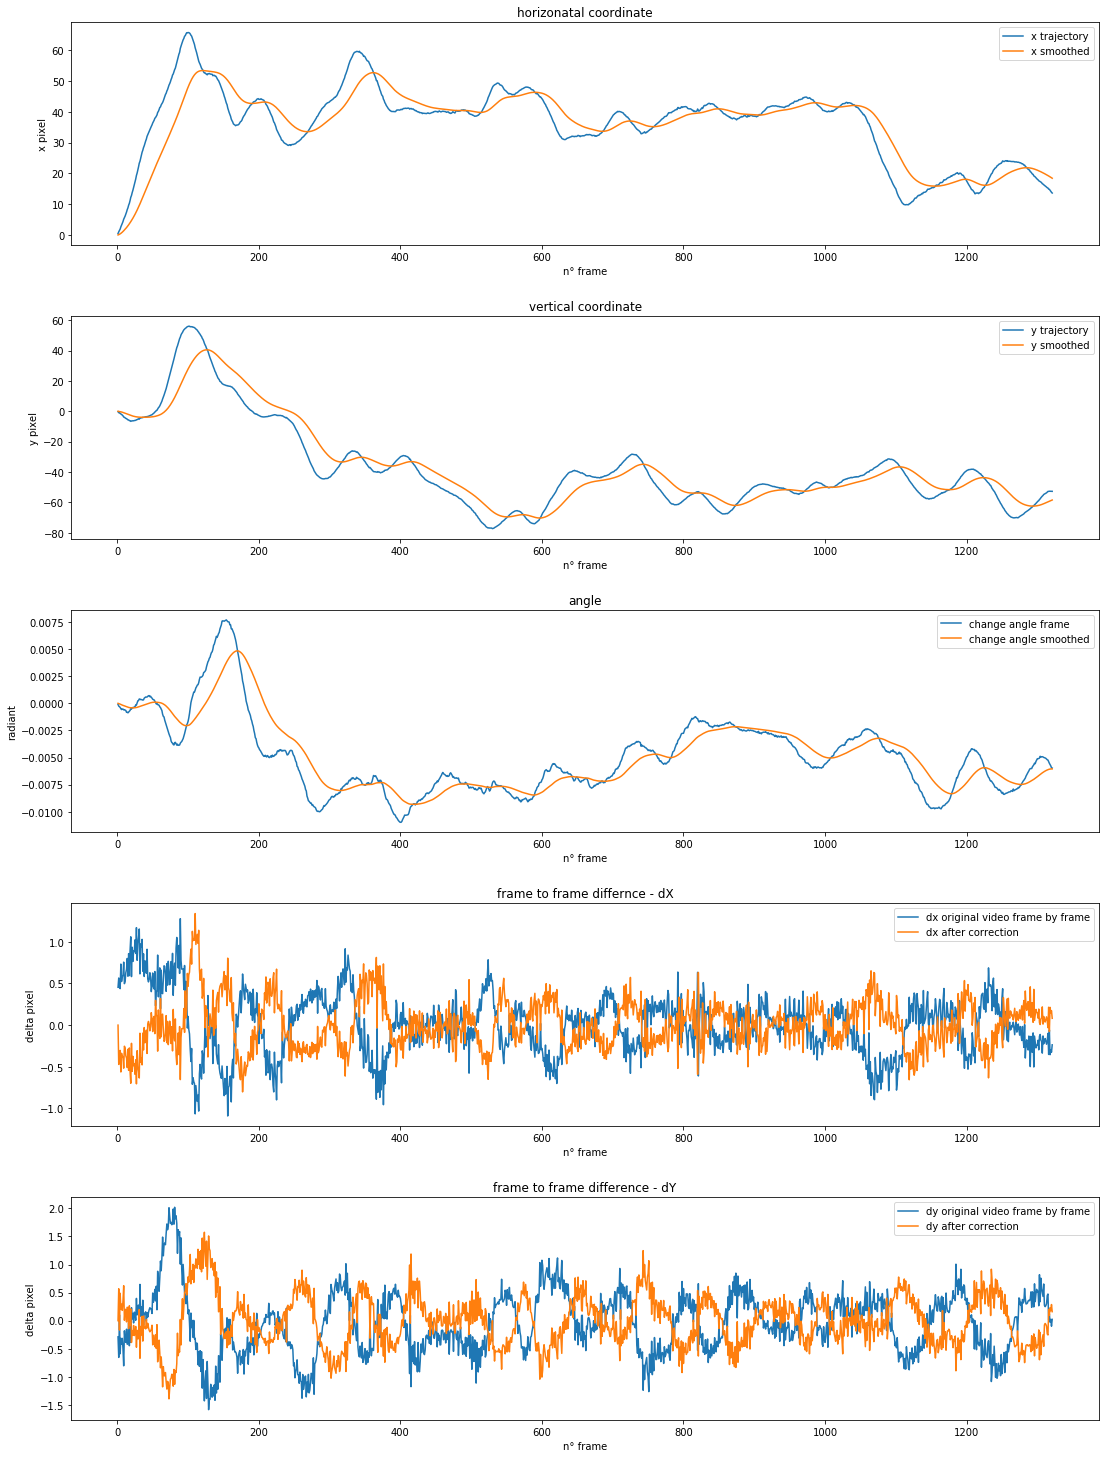

In [72]:
# Plot graphs
fig, axs = plt.subplots(5, 1,figsize=(15,20))
fig.tight_layout(h_pad=5.0, w_pad=5.0)
axs[0].plot(trj.index,trj['x'])
axs[0].plot(trj.index,smt_trj['Xx'])
axs[0].legend(['x trajectory','x smoothed'])
axs[0].set_title('horizonatal coordinate')
axs[1].plot(trj.index, trj['y'])
axs[1].plot(trj.index, smt_trj['Xy'])
axs[1].legend(['y trajectory','y smoothed'])
axs[1].set_title('vertical coordinate')
axs[2].plot(trj.index, trj['a'])
axs[2].plot(trj.index, smt_trj['Xa'])
axs[2].legend(['change angle frame','change angle smoothed'])
axs[2].set_title('angle')
axs[3].plot(trf.index,trf['dx'])
axs[3].plot(trf.index,p_c_trf['delta_x'])
axs[3].legend(['dx original video frame by frame','dx after correction'])
axs[3].set_title('frame to frame differnce - dX')
axs[4].plot(p_c_trf.index,trf['dy'])
axs[4].plot(p_c_trf.index,p_c_trf['delta_y'])
axs[4].legend(['dy original video frame by frame','dy after correction'])
axs[4].set_title('frame to frame difference - dY')

axs[0].set(xlabel='n° frame',ylabel='x pixel')
axs[1].set(xlabel='n° frame',ylabel='y pixel')
axs[2].set(xlabel='n° frame',ylabel='radiant')
axs[3].set(xlabel='n° frame',ylabel='delta pixel')
axs[4].set(xlabel='n° frame',ylabel='delta pixel');

In [76]:
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)